In [1]:
from libs.edgelistParser import edgelistParser
from libs.utils import list2matrix, getInOutDegree
from libs.page_rank import approximateSimrank, localPageRank
from libs.plotNetwork import plotNetworkClusters
import numpy as np
from matplotlib import pyplot as plt
import heapq as hq
import networkx as nx
from matplotlib import cm
from matplotlib.colors import rgb2hex

In [2]:
# load the Facebook dataset
A, N, D = edgelistParser("datasets/facebook/0.edges", "raw_list")

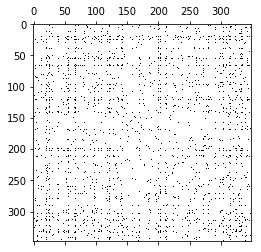

In [3]:
# convert the edge list to a dense matrix
A_mat = list2matrix(A)
plt.figure()
plt.spy(A_mat)
plt.show()

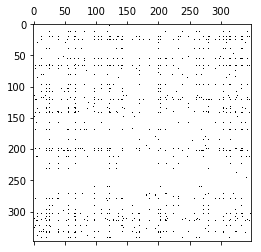

In [4]:
# generate the L matrix
L = localPageRank(A, c=0.85, use_only_neighbours=True)
L_mat = list2matrix(L)
plt.figure()
plt.spy(L_mat)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


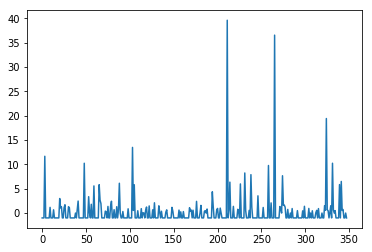

In [5]:
inDeg, outDeg = getInOutDegree(L)
ratio = np.array(inDeg)/np.array(outDeg)
ratio[np.logical_not(np.isfinite(ratio))]=-1
ratio_th = ratio.copy()
th = 1
ratio_th[ratio_th>th] = th
plt.figure()
plt.plot(ratio)

In [6]:
def plotNetwork(A_mat, A, colors, pos=None):
    # test the network plot
    G = nx.from_numpy_matrix(A_mat)

    plt.figure(num=None, figsize=(15, 10), facecolor='w', edgecolor='k')
    
    if pos is None:
        pos = nx.spring_layout(G)
    for n in range(len(A)):
        nx.draw_networkx_nodes(G, pos, [n], 5, node_color = rgb2hex(colors[n][:3]))

    nx.draw_networkx_edges(G, pos, alpha=0.1)

    plt.show()
    
    return pos

In [7]:
x = ratio/ratio.max()
colors_ratio = cm.get_cmap('viridis')(x)
x = np.array(inDeg)/np.array(inDeg).max()
colors_inDeg = cm.get_cmap('viridis')(x)
x = np.array(outDeg)/np.array(outDeg).max()
colors_outDeg = cm.get_cmap('viridis')(x)
x = ratio_th/ratio_th.max()
colors_ratio_th = cm.get_cmap('viridis')(x)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


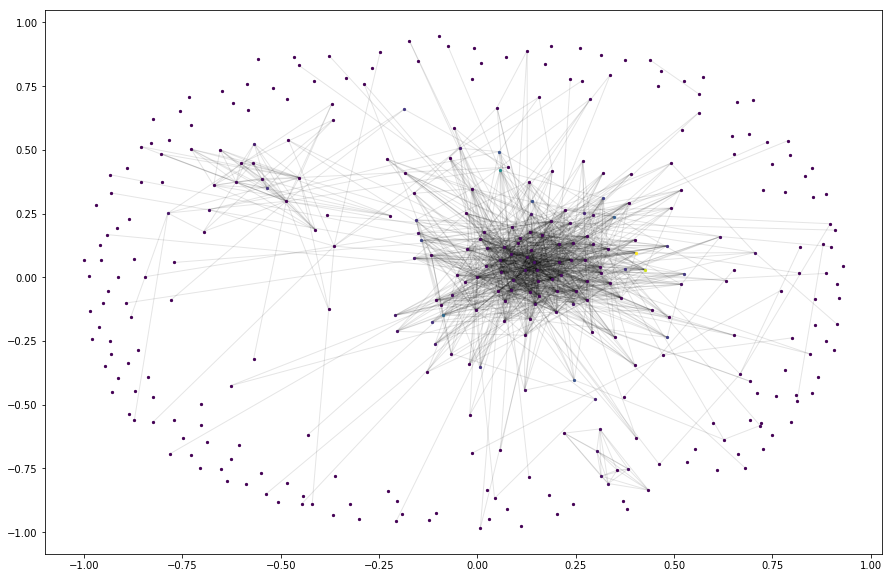

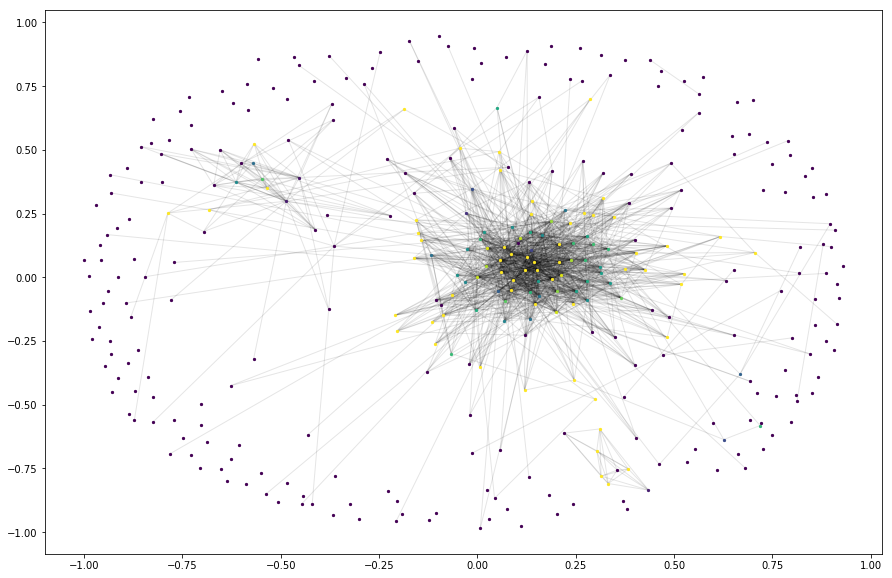

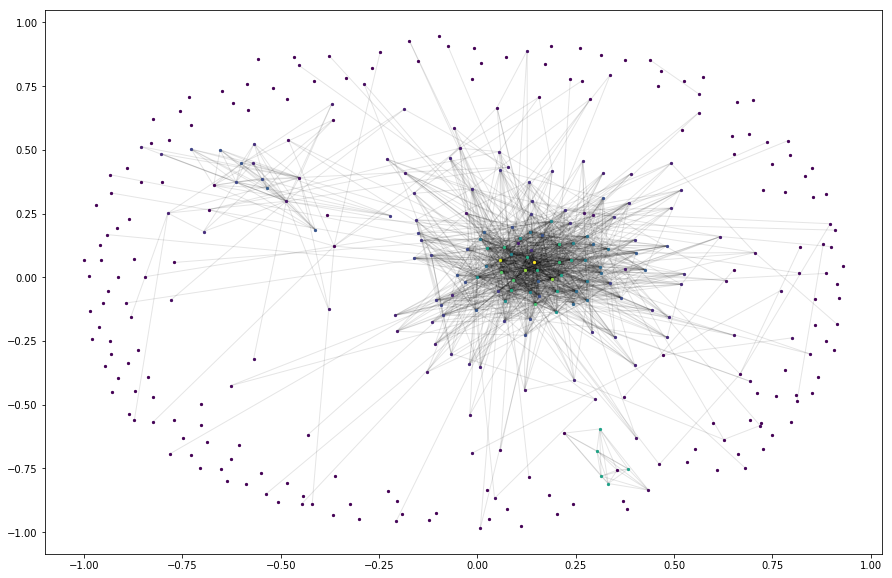

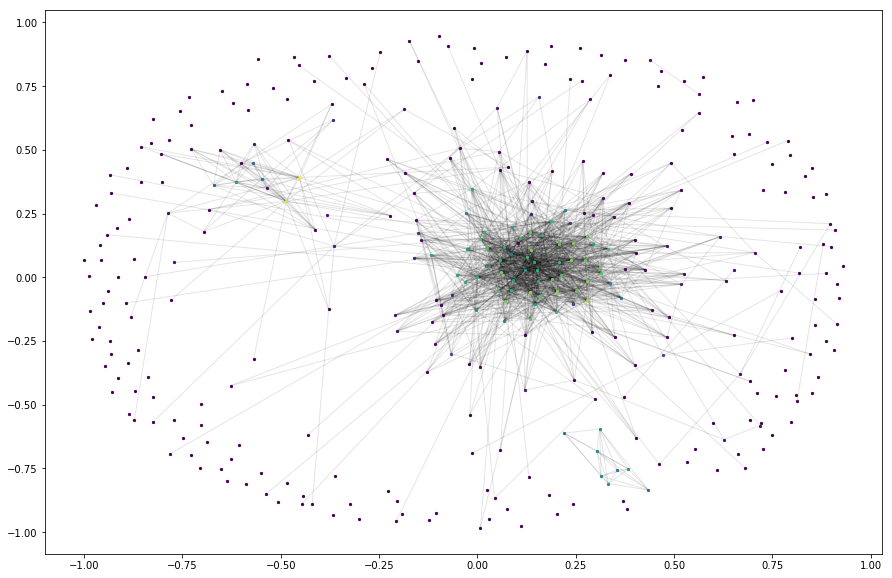

In [8]:
pos = plotNetwork(L_mat, A, colors_ratio)
plotNetwork(L_mat, A, colors_ratio_th, pos)
plotNetwork(L_mat, A, colors_inDeg, pos)
_ = plotNetwork(L_mat, A, colors_outDeg, pos)